In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lgg-mri-segmentation/kaggle_3m/README.md
/kaggle/input/lgg-mri-segmentation/kaggle_3m/data.csv
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_27.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_52.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_10.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8_mask.tif
/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34_mask.tif
/kaggle/input

In [3]:
df = pd.read_csv("/kaggle/input/lgg-mri-segmentation/kaggle_3m/data.csv")

In [4]:
df

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0    TCGA_CS_4941            2.0                 4.0             2        2.0   
1    TCGA_CS_4942            1.0                 5.0             2        1.0   
2    TCGA_CS_4943            1.0                 5.0             2        1.0   
3    TCGA_CS_4944            NaN                 5.0             2        1.0   
4    TCGA_CS_5393            4.0                 5.0             2        1.0   
..            ...            ...                 ...           ...        ...   
105  TCGA_HT_8563            2.0                 5.0             3        1.0   
106  TCGA_HT_A5RC            2.0                 4.0             2        2.0   
107  TCGA_HT_A616            NaN                 5.0             2        1.0   
108  TCGA_HT_A61A            NaN                 5.0             2        NaN   
109  TCGA_HT_A61B            NaN                 5.0             2        1.0   

     RPPACluster  OncosignCluster  COCCluster  histological_type  \
0            NaN              3.0           2                1.0   
1            1.0              2.0           1                1.0   
2            2.0              2.0           1                1.0   
3            2.0              1.0           1                1.0   
4            2.0              3.0           1                1.0   
..           ...              ...         ...                ...   
105          NaN              2.0           2                1.0   
106          NaN              3.0           2                1.0   
107          NaN              2.0           1                1.0   
108          NaN              NaN           1                3.0   
109          NaN              2.0           1                NaN   

     neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                          2.0                1.0         3.0             2.0   
1                          2.0                1.0         3.0             2.0   
2                          2.0                1.0         1.0             2.0   
3                          1.0                1.0         3.0             6.0   
4                          2.0                1.0         1.0             6.0   
..                         ...                ...         ...             ...   
105                        2.0                1.0         3.0             2.0   
106                        2.0                1.0         1.0             2.0   
107                        1.0                1.0         1.0             2.0   
108                        1.0                1.0         1.0             6.0   
109                        NaN                NaN         NaN             NaN   

     gender  age_at_initial_pathologic  race  ethnicity  death01  
0       2.0                       67.0   3.0        2.0      1.0  
1       1.0                       44.0   2.0        NaN      1.0  
2       2.0                       37.0   3.0        NaN      0.0  
3       2.0                       50.0   3.0        NaN      0.0  
4       2.0                       39.0   3.0        NaN      0.0  
..      ...                        ...   ...        ...      ...  
105     1.0                       30.0   3.0        2.0      0.0  
106     1.0                       70.0   3.0        2.0      1.0  
107     1.0                       36.0   3.0        2.0      0.0  
108     1.0                       20.0   3.0        2.0      0.0  
109     NaN                        NaN   NaN        NaN      NaN  

[110 rows x 18 columns]

In [5]:
#df.value_counts()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [7]:
import cv2
from glob import glob
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [8]:
# testing glob
mask_files = glob('/kaggle/input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
train_files = [file.replace('_mask', '') for file in mask_files]

In [8]:
#mask_files

In [9]:
def diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value<=0.5:  # if mask values <=0.5 then consider it all black no tumour there
        return '0'
    else:
        return '1'
df = pd.DataFrame({"image_path": train_files,
                   "mask_path": mask_files,
                  "diagnosis":[diagnosis(x) for x in mask_files]})
df.head()

image_path  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                           mask_path diagnosis  
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...         0  
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...         0  
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...         1  
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...         1  
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...         1

In [10]:
#df.value_counts()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   diagnosis   3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [12]:
df.diagnosis.value_counts()

0    2556
1    1373
Name: diagnosis, dtype: int64

**2556 non-tumour**

**1373 tumour**

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage import io

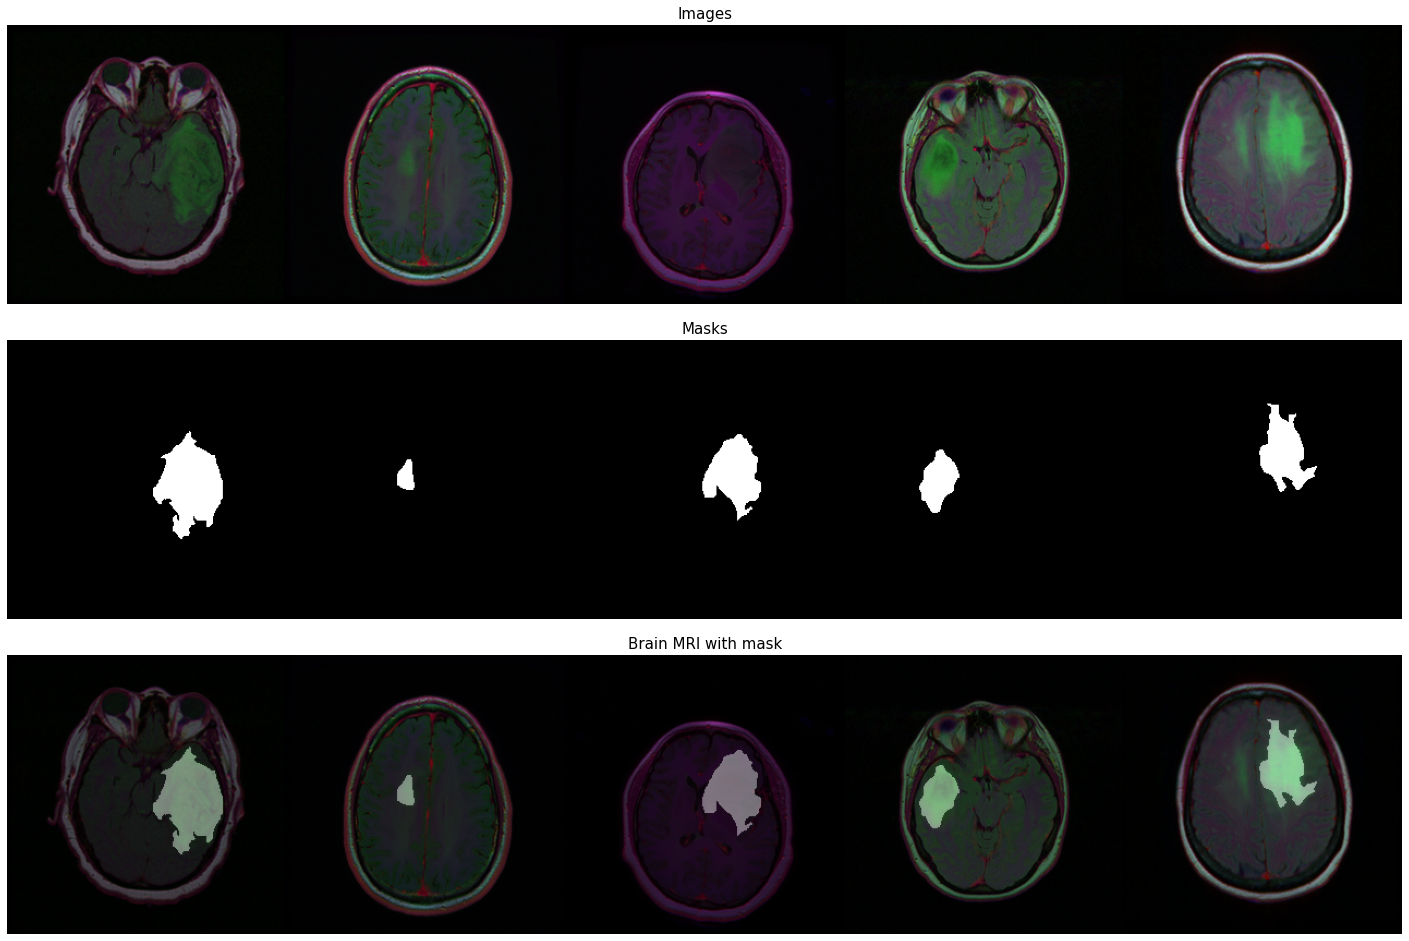

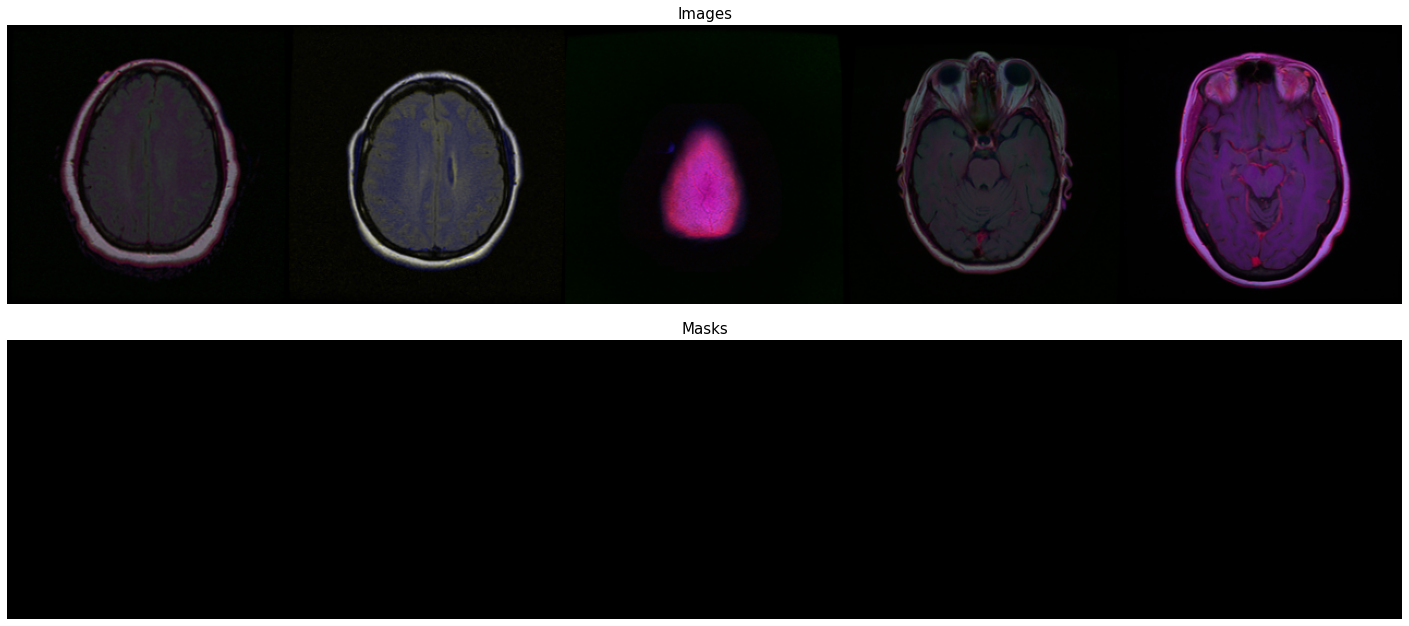

In [16]:
df_positive = df[df['diagnosis']=='1'].sample(5).values
df_negative = df[df['diagnosis']=='0'].sample(5).values

def show_data(df, positive=True):
    images = []
    masks = []
    for data in df:
        img = cv2.imread(data[0])
        mask = cv2.imread(data[1])
        images.append(img)
        masks.append(mask)
    images = np.hstack(np.array(images))
    masks = np.hstack(np.array(masks))
    
    fig = plt.figure(figsize=(25,25))
    if positive:
        grid = ImageGrid(fig, 111, nrows_ncols=(3,1), axes_pad=0.5)
    else:
        grid = ImageGrid(fig, 111, nrows_ncols=(2,1), axes_pad=0.5)
    grid[0].imshow(images)
    grid[0].set_title('Images', fontsize=15)
    grid[0].axis('off')
    grid[1].imshow(masks)
    grid[1].set_title('Masks', fontsize=15)
    grid[1].axis('off')
    if positive:
        grid[2].imshow(images)
        grid[2].imshow(masks, alpha=0.4)
        grid[2].set_title('Brain MRI with mask', fontsize=15)
        grid[2].axis('off')
        
show_data(df_positive)
show_data(df_negative, positive=False)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_df, test_df = train_test_split(df,test_size=0.2)
train_df, val_df = train_test_split(train_df,test_size=0.2)

In [19]:
print(len(train_df))
print(len(test_df))
print(len(val_df))

2514
786
629


In [20]:
IMG_SIZE = (256,256)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
def adjust_data(img,mask):
    img = img/255.
    mask = mask/255.
    mask[mask>0.5] = 1
    mask[mask<=0.5] = 0
    
    return (img, mask)

In [37]:
def train_generator(data_frame,aug_dict,seed=1):
    image_gen = ImageDataGenerator(**aug_dict)
    mask_gen  = ImageDataGenerator(**aug_dict)
    image_set = image_gen.flow_from_dataframe(data_frame,
                                              x_col='image_path',
                                              class_mode = None,
                                              target_size = IMG_SIZE,
                                              color_mode = 'rgb',
                                              batch_size = 32,
                                              seed = seed,
                                              save_prefix = 'image',
                                              save_to_dir = None
                                              )
    mask_set = mask_gen.flow_from_dataframe(data_frame,
                                            x_col='mask_path',
                                            class_mode = None,
                                            target_size = IMG_SIZE,
                                            color_mode = 'grayscale',
                                            batch_size = 32,
                                            seed = seed,
                                            save_prefix = 'mask',
                                            save_to_dir = None
                                            )
    train_set = zip(image_set,mask_set)
    for (imgs,masks) in train_set:
        imgs,masks = adjust_data(imgs,masks)
        yield (imgs,masks)  # yield is used for generator object thats why return is not used.

In [38]:
#!pip install -q git+https://github.com/tensorflow/examples.git

In [39]:
#from tensorflow_examples.models.pix2pix import pix2pix

In [40]:
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Conv2D,UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten

In [41]:
def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    act1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, (3, 3), padding='same')(act1)
    bn1 = BatchNormalization(axis=3)(conv1)
    act1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(act1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    act2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, (3, 3), padding='same')(act2)
    bn2 = BatchNormalization(axis=3)(conv2)
    act2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(act2)

    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    act3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, (3, 3), padding='same')(act3)
    bn3 = BatchNormalization(axis=3)(conv3)
    act3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(act3)
    
    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    act4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, (3, 3), padding='same')(act4)
    bn4 = BatchNormalization(axis=3)(conv4)
    act4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(act4)

    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    act5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(act5)
    bn5 = BatchNormalization(axis=3)(conv5)
    act5 = Activation('relu')(bn5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(act5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    act6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, (3, 3), padding='same')(act6)
    bn6 = BatchNormalization(axis=3)(conv6)
    act6 = Activation('relu')(bn6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(act6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    act7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, (3, 3), padding='same')(act7)
    bn7 = BatchNormalization(axis=3)(conv7)
    act7 = Activation('relu')(bn7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(act7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    act8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, (3, 3), padding='same')(act8)
    bn8 = BatchNormalization(axis=3)(conv8)
    act8 = Activation('relu')(bn8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(act8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    act9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, (3, 3), padding='same')(act9)
    bn9 = BatchNormalization(axis=3)(conv9)
    act9 = Activation('relu')(bn9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(act9)

    return Model(inputs=[inputs], outputs=[conv10])

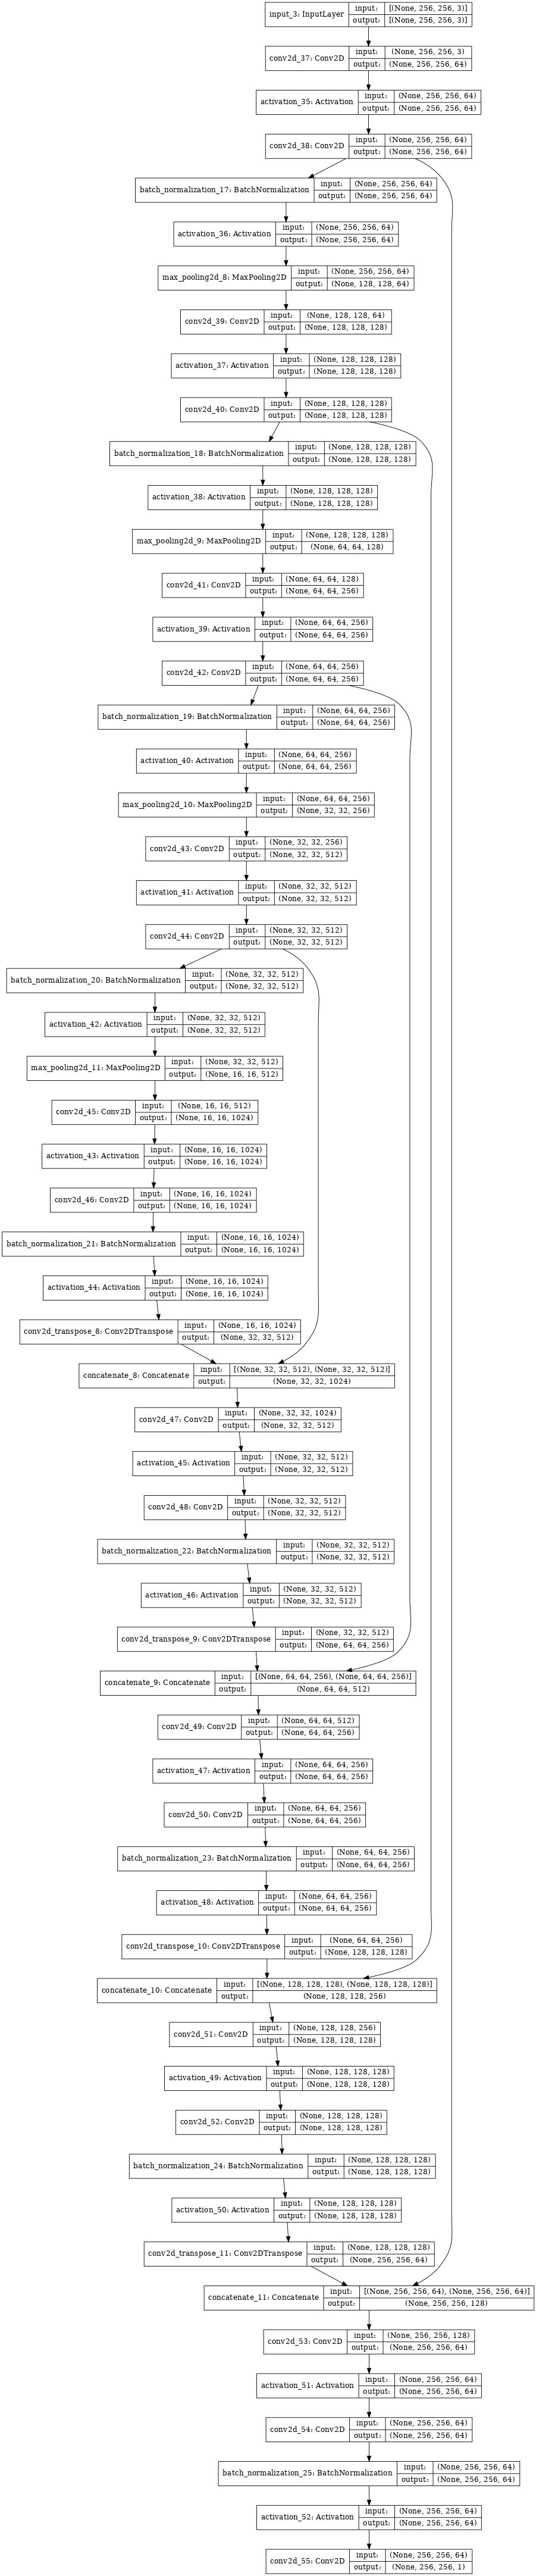

In [42]:
model = unet(input_size=(IMG_SIZE[0], IMG_SIZE[1], 3))
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [43]:
EPOCHS = 20
BATCH_SIZE = 32
learning_rate = 1e-4

In [44]:
train_generator_args = dict(rotation_range=0.1,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')

In [45]:
train_gen = train_generator(train_df,train_generator_args)
val_gen = train_generator(val_df,dict())

In [55]:
from tensorflow.keras import backend as K

In [56]:
smooth = 1 
def iou(y_true,y_pred):
    intersection = K.sum(y_true*y_pred)
    sum_ = K.sum(y_true+y_pred)
    jac = (intersection+smooth)/(sum_ - intersection + smooth)
    
    return jac

In [57]:
optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[iou])


In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 256, 256, 64) 0           conv2d_37[0][0]                  
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 256, 256, 64) 36928       activation_35[0][0]              
____________________________________________________________________________________________

In [58]:
ok = model.fit(train_gen,
                steps_per_epoch=len(train_df)/BATCH_SIZE, 
                epochs=EPOCHS, 
                validation_data = val_gen,
                validation_steps=len(val_df)/BATCH_SIZE
               )

Epoch 1/20
78/78 [==============================] - 74s 928ms/step - loss: 0.0241 - iou: 0.2720 - val_loss: 0.0231 - val_iou: 0.2892
Epoch 2/20
78/78 [==============================] - 71s 909ms/step - loss: 0.0214 - iou: 0.3045 - val_loss: 0.0208 - val_iou: 0.2952
Epoch 3/20
78/78 [==============================] - 71s 910ms/step - loss: 0.0198 - iou: 0.3283 - val_loss: 0.0172 - val_iou: 0.3421
Epoch 4/20
78/78 [==============================] - 71s 909ms/step - loss: 0.0181 - iou: 0.3544 - val_loss: 0.0178 - val_iou: 0.3129
Epoch 5/20
78/78 [==============================] - 71s 907ms/step - loss: 0.0157 - iou: 0.3926 - val_loss: 0.0158 - val_iou: 0.3730
Epoch 6/20
78/78 [==============================] - 72s 915ms/step - loss: 0.0148 - iou: 0.4134 - val_loss: 0.0165 - val_iou: 0.3937
Epoch 7/20
78/78 [==============================] - 71s 912ms/step - loss: 0.0140 - iou: 0.4359 - val_loss: 0.0138 - val_iou: 0.3917
Epoch 8/20
78/78 [==============================] - 72s 920ms/step - 

Text(0.5, 1.0, 'IoU')

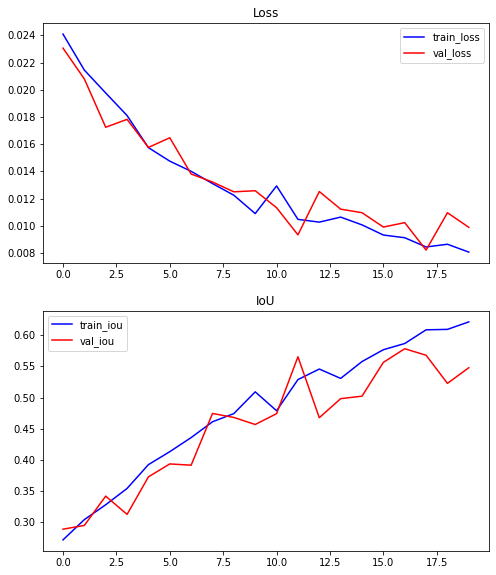

In [59]:
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.plot(model.history.history['loss'], 'b-', label='train_loss')
plt.plot(model.history.history['val_loss'], 'r-', label='val_loss')
plt.legend(loc='best')
plt.title('Loss')

plt.subplot(3,1,2)
plt.plot(model.history.history['iou'], 'b-', label='train_iou')
plt.plot(model.history.history['val_iou'], 'r-', label='val_iou')
plt.legend(loc='best')
plt.title('IoU')

In [60]:
test_gen = train_generator(test_df,dict())

In [62]:
results = model.evaluate(test_gen, steps=len(test_df)/BATCH_SIZE)

Found 786 validated image filenames.
Found 786 validated image filenames.
24/24 [==============================] - 7s 290ms/step - loss: 0.0090 - iou: 0.5658


In [63]:
print("Test IOU: ",results)

Test IOU:  [0.008993687108159065, 0.5657708048820496]


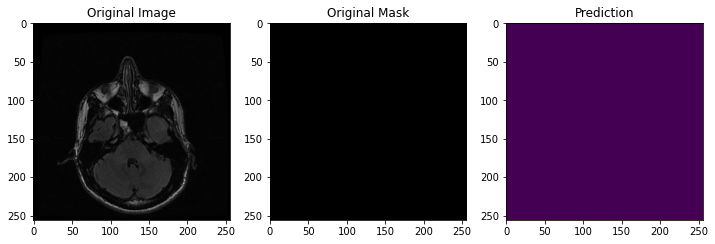

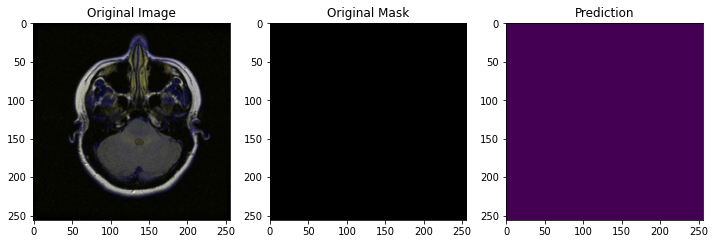

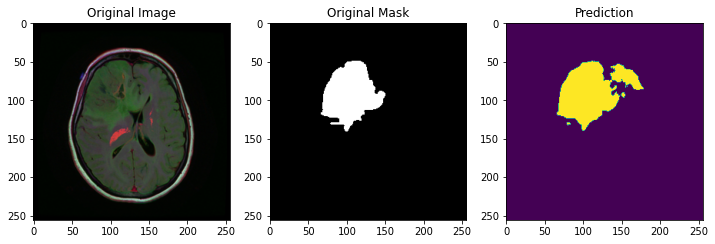

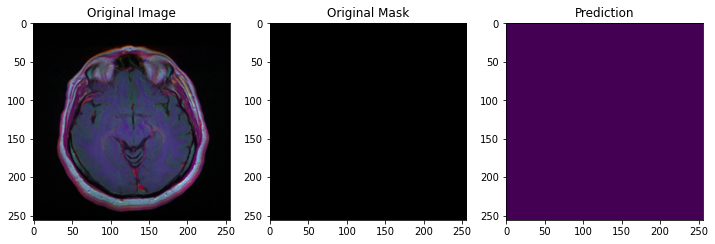

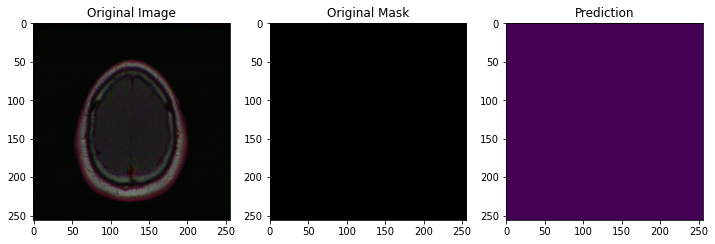

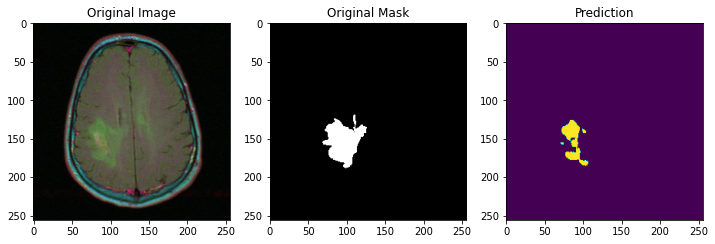

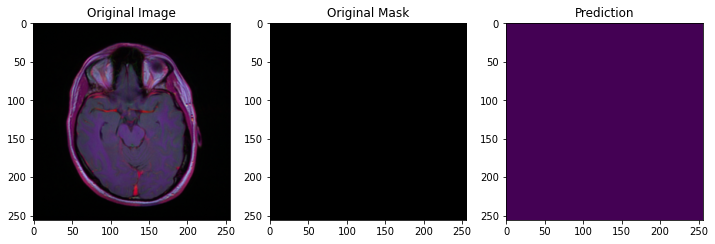

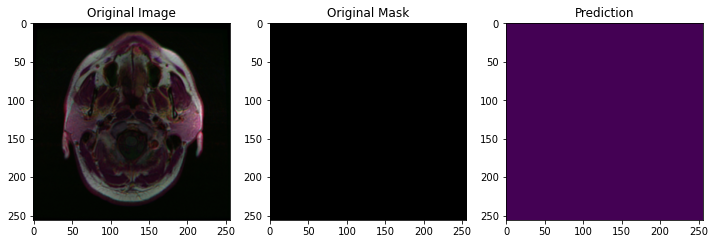

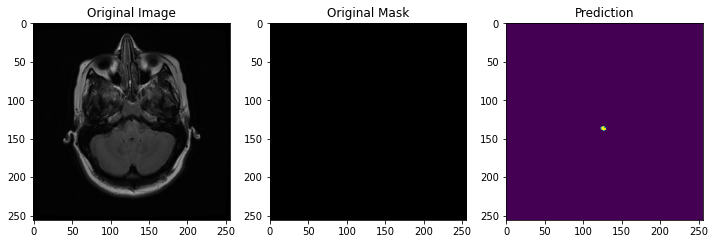

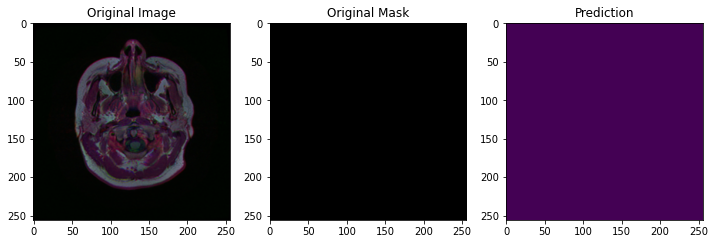

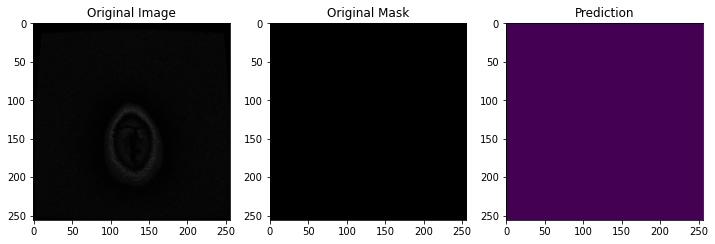

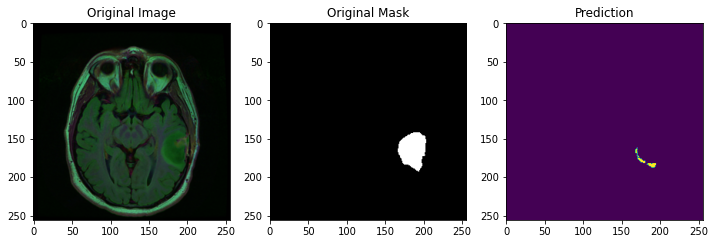

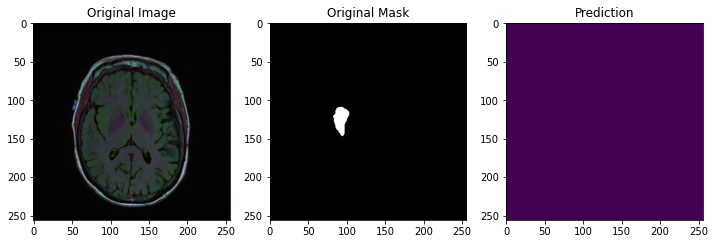

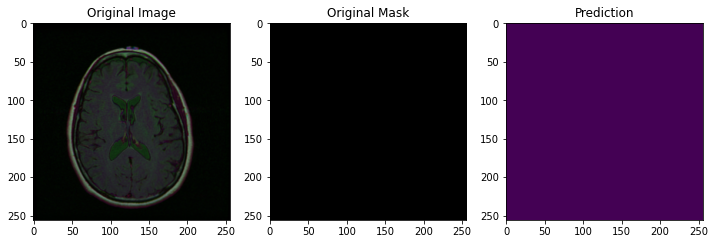

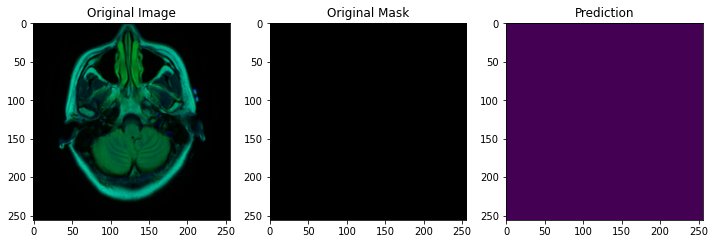

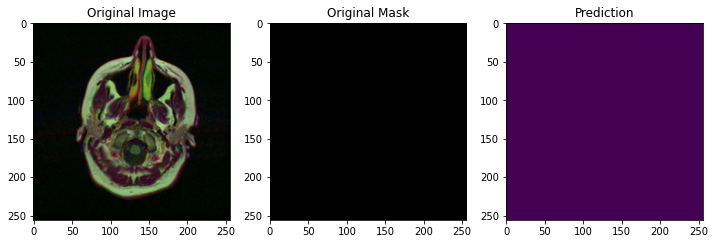

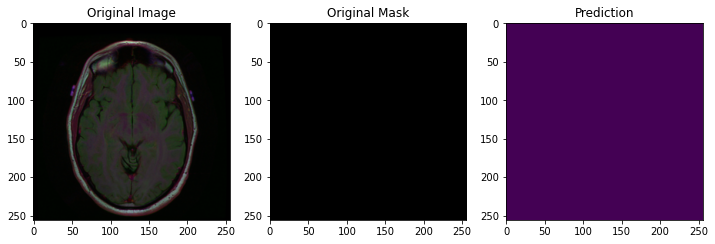

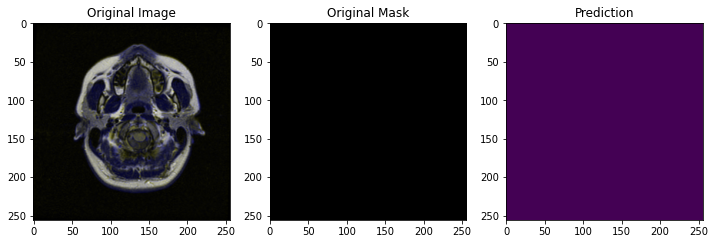

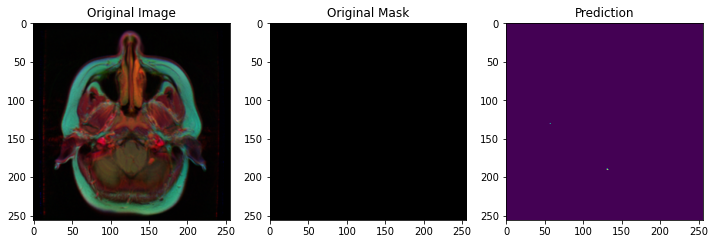

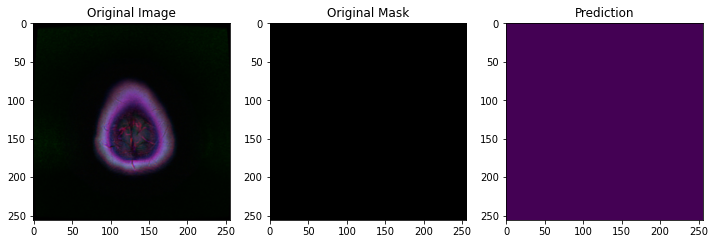

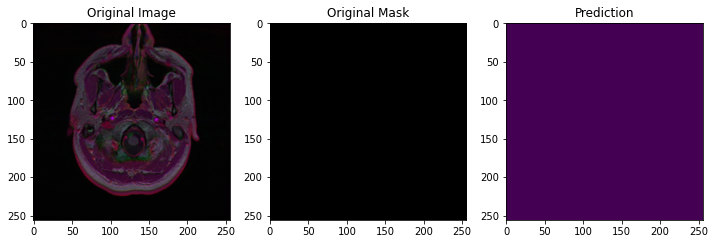

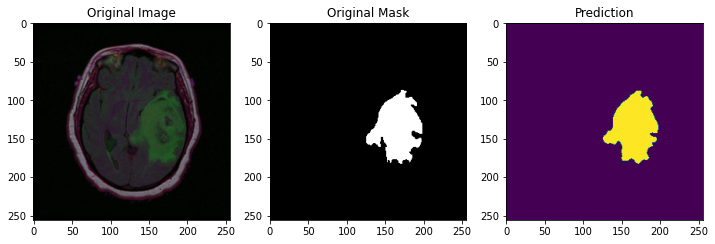

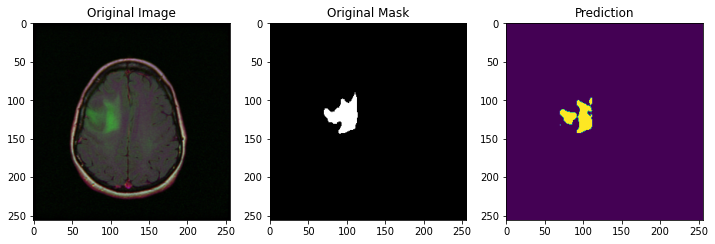

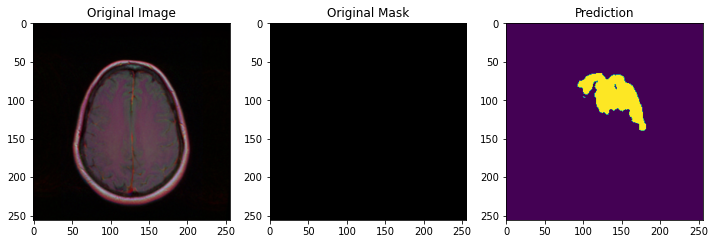

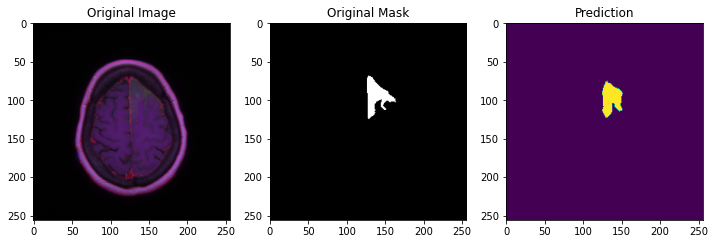

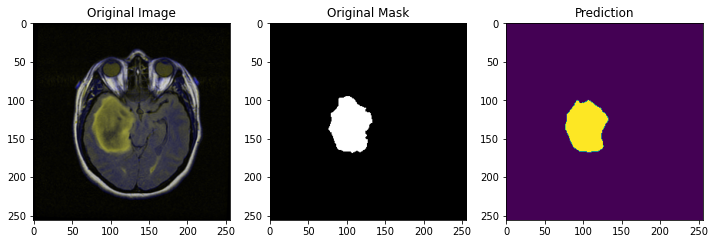

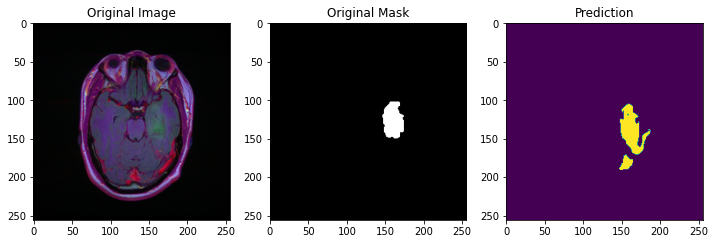

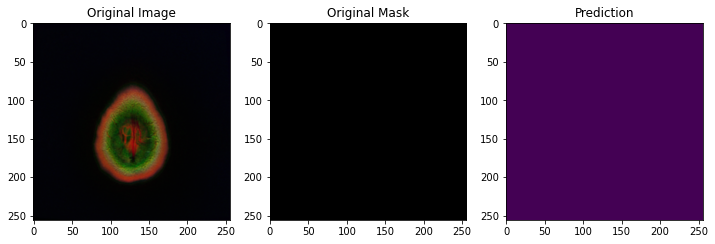

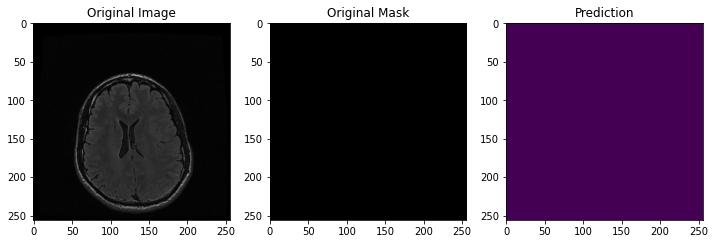

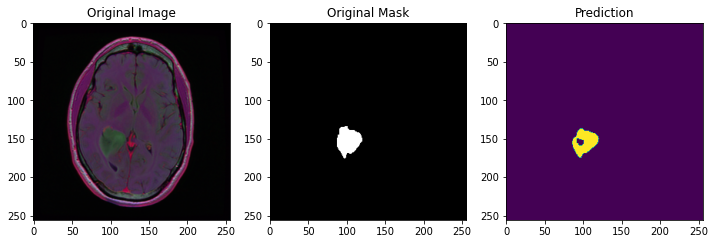

In [64]:
for i in range(30):
    index=np.random.randint(1,len(test_df.index))
    img = cv2.imread(test_df['image_path'].iloc[index])
    img = cv2.resize(img,IMG_SIZE)
    img = img/255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(test_df['mask_path'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()

In [65]:
pred = np.where(pred > 0.5 , 1 , 0)
pred

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]]])

In [66]:
pred = np.squeeze(pred) > .5
pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [68]:
cor , incor = 0 , 0
for i in range(len(test_df.index)):
    index=i
    img = cv2.imread(test_df['image_path'].iloc[index])
    img = cv2.resize(img,IMG_SIZE)
    img = img/255
    img = img[np.newaxis, :, :, :]
    pred = (np.squeeze(model.predict(img)) > 0.5)
    mask = np.squeeze(cv2.imread(test_df['mask_path'].iloc[index]))
    print(f"Prediction {i}: " , pred.any() == mask.any())
    if pred.any() == mask.any():
        cor += 1
    else:
        incor += 1

Prediction 0:  True
Prediction 1:  False
Prediction 2:  True
Prediction 3:  True
Prediction 4:  True
Prediction 5:  True
Prediction 6:  True
Prediction 7:  True
Prediction 8:  True
Prediction 9:  True
Prediction 10:  True
Prediction 11:  True
Prediction 12:  False
Prediction 13:  True
Prediction 14:  False
Prediction 15:  True
Prediction 16:  False
Prediction 17:  True
Prediction 18:  True
Prediction 19:  True
Prediction 20:  True
Prediction 21:  True
Prediction 22:  True
Prediction 23:  True
Prediction 24:  True
Prediction 25:  True
Prediction 26:  True
Prediction 27:  True
Prediction 28:  True
Prediction 29:  True
Prediction 30:  True
Prediction 31:  True
Prediction 32:  True
Prediction 33:  False
Prediction 34:  True
Prediction 35:  True
Prediction 36:  False
Prediction 37:  True
Prediction 38:  True
Prediction 39:  True
Prediction 40:  True
Prediction 41:  True
Prediction 42:  True
Prediction 43:  True
Prediction 44:  True
Prediction 45:  True
Prediction 46:  True
Prediction 47:  F

In [69]:
print("Correct = " , cor , "Incorrect = " , incor )
print("Accuracy = " , (cor/(cor+incor)) * 100)

Correct =  662 Incorrect =  124
Accuracy =  84.22391857506362
